# Credit Risk Prediction
*By Aditya Nugraha*

## Business Understanding

**Context**

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman dapat diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses. Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan.

**Problem Statement**

Adanya potensi kerugian yang disebabkan oleh credit risk membuat perusahaan harus lebih berhati-hati dengan meminimalisir resiko tersebut, perusahaan juga sekaligus harus secara hati-hati agar langkah yang diambil kedepannya tidak menyebabkan kehilangan klien yang berpotensi. Dalam hal ini tim Data Science diminta untuk menemukan pola dalam data untuk meminimalisir kerugian akibat resiko tersebut sekaligus tidak menghilangkan klien yang berpotensi.

Dengan mengetahui calon debitur yang berpotensi memiliki kredit macet, dapat diminimalisir dengan cara menetapkan batas bawah skor evaluasi yang akan dipilih. selain itu, perusahaan dapat membuat strategi jika memang terjadi kredit macet agar tidak sampai mempengaruhi kinerja perusahaan secara langsung.

**Goals**

Berdasarkan masalah tersebut, perusahaan ingin memiliki kemampuan memprediksi potensi kelayakan klien yang akan melakukan pengajuan kredit, sehingga dapat memaksimalkan keuntungan yang didapat dengan cara meminimalisir kemungkinan terjadinya kredit macet.

Dan juga, perusahaan ingin mengetahui apa yang membuat klien berpotensi atau tidak berpotensi memiliki kredit macet kedepannya. sehingga mereka dapat membuat rencana jika ada klien yang cukup beresiko tetapi perusahaan ingin mengambil resiko tersebut agar jika klien tersebut memang bermasalah maka tidak sampai mempengaruhi kinerja perusahaan secara langsung.

**Analytics Approach**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan klien apakah dia memiliki potensi kredit macet atau tidak.

kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang klien memiliki potensi kredit macet tersebut.

**Metric Evaluation: ROC AUC (biasa disebut AUROC)**

ROC (Receiver Operating Characteristics) adalah semacam alat ukur performance untuk classification problem dalam menentukan threshold dari suatu model. Contohnya: pada logistic regression, default dari thresholdnya adalah 0.5

AUC adalah luas area di bawah curve ROC

Kurva ROC dibuat berdasarkan nilai telah didapatkan pada perhitungan dengan confusion matrix, yaitu antara False Positive Rate dengan True Positive Rate. Dimana:

- False Positive Rate (FPR) = False Positive / (False Positive + True Negative)
- True Positive Rate (TPR) = True Positive / (True Positive + False Negative)

Dan berikut adalah contoh kurva ROC.

<img src="assets/ROC-curve.jpg" alt="AUROC Curve"/>

Untuk membaca kurva ini sangat mudah, kinerja algoritma klasifikasi adalah:

- JELEK, jika kurva yang dihasilkan mendekati garis baseline atau garis yang melintang dari titik 0,0.
- BAGUS, jika kurva mendekati titik 0,1.

Pada contoh di atas dapat dilihat 2 kurva, yaitu kurva dengan warna biru dan kurva dengan warna merah. Berdasarkan cara membaca di atas, maka dapat disimpulkan kinerja kurva berwarna biru lebih bagus dibandingkan kinerja kurva berwarna merah. dengan cara seperti ini maka kita dengan mudah membandingkan bagus atau tidaknya teknik-teknik yang digunakan untuk menyelesaikan kasus klasifikasi pada suatu percobaan.

Selain itu jika ingin membandingkan nilai kinerja kurva biru dan kurva merah dalam bentuk angka maka dapat dilakukan dengan membandingkan luas di bawah kurva atau Area Under Curve (AUC), dari gambar dapat dapat disimpulkan luas area kurva berwarna biru lebih besar dibanding luas area kurva berwarna merah.

Penelitian uji diagnostic akan semakin baik bila nilai AUC mendekati 1. 
- 0.5 ≤ AUC < 0.6 sangat lemah 
- 0.6 ≤ AUC < 0.7 lemah 
- 0.7 ≤ AUC < 0.8 sedang
- 0.8 ≤ AUC < 0.9 baik
- 0.9 ≤ AUC ≤ 1 sangat baik.

**Pada dunia credit risk modeling, umumnya AUC di atas 0.7 sudah termasuk performa yang baik**

References:
- https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it
- https://staf.ulm.ac.id/rezafaisal/2017/01/12/menghitung-kinerja-algoritma-klasifikasi-pilih-roc-curve-atau-precision-recall-curve/

**Data Understanding**

Data yang digunakan disediakan oleh Home Credit Indonesia, layanan yang didedikasikan untuk menyediakan jalur kredit (pinjaman) kepada populasi yang tidak memiliki rekening bank. Memprediksi apakah klien akan melunasi pinjaman atau mengalami kesulitan adalah kebutuhan bisnis yang penting, dan Home Credit menyelenggarakan virtual internship experience ini di platform Rakamin untuk melihat model seperti apa yang dapat dikembangkan komunitas pembelajaran mesin untuk membantu mereka dalam tugas ini.

- 0: Klien yang tidak memiliki kesulitan pembayaran
- 1: Klien yang memiliki kesulitan pembayaran (Keterlambatan, dll)

Ada 7 dataset berbeda:
- application_train/application_test: data train dan test utama dengan informasi tentang setiap aplikasi pinjaman di Home Credit. Setiap pinjaman memiliki baris sendiri dan diidentifikasi oleh kolom `SK_ID_CURR`. Data test dilengkapi dengan `TARGET` yang menunjukkan:
    - 0: Klien yang tidak memiliki kesulitan pembayaran
    - 1: Klien yang memiliki kesulitan pembayaran (Keterlambatan, dll)
- bureau: data tentang kredit klien sebelumnya dari lembaga keuangan lain. Setiap kredit sebelumnya memiliki baris sendiri di biro, tetapi satu pinjaman dalam data aplikasi dapat memiliki beberapa kredit sebelumnya.
- bureau_balance: data bulanan tentang kredit sebelumnya di biro. Setiap baris adalah satu bulan dari kredit sebelumnya, dan satu kredit sebelumnya dapat memiliki beberapa baris, satu untuk setiap bulan dari panjang kredit.
- previous_application: aplikasi pinjaman sebelumnya di Home Credit. Setiap pinjaman saat ini dalam data aplikasi dapat memiliki beberapa pinjaman sebelumnya. Setiap aplikasi sebelumnya memiliki satu baris dan diidentifikasi oleh kolom `SK_ID_PREV`.
- POS_CASH_BALANCE: data bulanan tentang titik penjualan sebelumnya atau pinjaman tunai yang dimiliki klien dengan Home Credit. Setiap baris adalah satu bulan dari titik penjualan atau pinjaman tunai sebelumnya, dan satu pinjaman sebelumnya dapat memiliki banyak baris.
- credit_card_balance: data bulanan tentang kartu kredit milik klien sebelumnya dengan Home Credit. Setiap baris adalah satu bulan dari saldo kartu kredit, dan satu kartu kredit dapat memiliki banyak baris.
- installments_payment: riwayat pembayaran pinjaman sebelumnya di Home Credit. Ada satu baris untuk setiap pembayaran yang dilakukan dan satu baris untuk setiap pembayaran yang terlewat.

## Initialization

#### Libraries

In [88]:
import pandas as pd
import numpy as np
import pickle

# Visualization
import matplotlib.pyplot as plt

# Feature Engineering
# from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler #, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
# import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

# Imbalance Dataset
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Pandas Options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
pd.set_option("display.max_colwidth", 300)

#### Importing Data

In [2]:
train_backup = pd.read_csv("./datasets/application_train.csv")
test_backup = pd.read_csv("./datasets/application_test.csv")
bureau_backup = pd.read_csv("./datasets/bureau.csv")
bureau_balance_backup = pd.read_csv("./datasets/bureau_balance.csv")
credit_card_balance_backup = pd.read_csv("./datasets/credit_card_balance.csv")
installments_payments_backup = pd.read_csv("./datasets/installments_payments.csv")
POS_CASH_balance_backup = pd.read_csv("./datasets/POS_CASH_balance.csv")
previous_application_backup = pd.read_csv("./datasets/previous_application.csv")
columns_description = pd.read_csv("./datasets/HomeCredit_columns_description.csv", index_col=0).fillna("-")


In [3]:
train = train_backup.copy()
test = test_backup.copy()
bureau = bureau_backup.copy()
bureau_balance = bureau_balance_backup.copy()
credit_card_balance = credit_card_balance_backup.copy()
installments_payments = installments_payments_backup.copy()
POS_CASH_balance = POS_CASH_balance_backup.copy()
previous_application = previous_application_backup.copy()

#### User-Defined Function

In [4]:
def numerical_summary(data: pd.DataFrame, n: int = 4) -> pd.DataFrame:
    """
    Statistics summary for numerical data.
    
    Parameters
    ----------
    data : pandas dataframe
        the data to be displayed in summary
    n : int, optional
        determine the number after the comma of the result
    """
    
    # central tendency: mean, median
    mean = pd.DataFrame(data.apply(np.mean)).T
    median = pd.DataFrame(data.apply(np.median)).T

    # distribution: var, std, min, max, range, skew, kurtosis
    var = pd.DataFrame(data.apply(np.var)).T
    std = pd.DataFrame(data.apply(np.std)).T
    min_value = pd.DataFrame(data.apply(min)).T
    max_value = pd.DataFrame(data.apply(max)).T
    range_value = pd.DataFrame(data.apply(lambda x: x.max() - x.min())).T
    skewness = pd.DataFrame(data.apply(lambda x: x.skew())).T
    kurtosis = pd.DataFrame(data.apply(lambda x: x.kurtosis())).T

    # concatenates
    result = pd.concat([min_value, max_value, range_value, mean, median, var, std, skewness, kurtosis]).T.reset_index()
    result.columns = ["attributes","min","max", "range","mean","median", "var", "std","skewness","kurtosis"]
    
    return np.around(result, n)

In [5]:
def data_info(data:pd.DataFrame or pd.Series) -> pd.DataFrame:
    """
    Return a DataFrame info
    
    Parameters
    ----------
    data : DataFrame or Series
        the data to be displayed info
    
    Returns
    -------
    DataFrame
        - Attribute : Column names of data
        - Data Type : Data type of data
        - Null Count : calculate count of null values
        - Null % : Percentage of null values
        - Unique Count : How many unique value
        - Unique Value : Unique value
    """
    shape = data.shape
    null_pct = lambda x: np.around(x["Null Count"] * 100/len(data), 3)

    if type(data) == pd.DataFrame:
        info = data.dtypes.reset_index()
        info.columns = ['Attribute', 'Data Type']
        info["Null Count"] = data.isna().sum().values
        info["Null %"] = null_pct(info)
        info["Unique Count"] = data.nunique().values

        unique_value = []
        for col in data:
            unique_value.append(data[col].dropna().unique())
        info["Unique Value"] = unique_value
        
    elif type(data) == pd.Series:
        info = pd.DataFrame([data.name, data.dtype]).T
        info["Null Count"] = data.isna().sum()
        info["Null %"] = null_pct(info)
        info["Unique Count"] = data.nunique()
        info["Unique Value"] = [data.dropna().unique()]
        shape = shape+(1,)
        
    else:
        return "Input DataFrame or Series Only"
    
    print("Total Observation (Rows): %d" %shape[0])
    print("Total Attributes (Columns): %d" %shape[1])
    return info

In [6]:
def val_count(data:pd.Series) -> pd.DataFrame:
    """
    Return a DataFrame containing counts of unique rows in Series
    
    Parameters
    ----------
    data : Series
        the data to be displayed value counts
    
    Returns
    ------
    DataFrame
        - Values : Values name
        - Count : Count per value
        - % : Percentage of count
    """
    if type(data) == pd.Series:
        result = data.value_counts(dropna=False).reset_index()
        result.columns = ["Values", "Count"]
        result["%"] = np.around(result["Count"] * 100/len(data), 3)
        return result
    else:
        return "Input Series only"

## Exploring Data

### Data Structure & Description

<details>
    <summary>Click to Show/Hide the Content</summary>
    <img src="assets/erd.jpg" alt="ERD"/>
    <ul>
        <li>application_{train|test}.csv</li>
            <ul>
                <li>This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).</li>
                <li>Static data for all applications. One row represents one loan in our data sample.</li>
            </ul>
        <li>bureau.csv</li>
            <ul>
                <li>All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).</li>
                <li>For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.</li>
            </ul>
        <li>bureau_balance.csv</li>
            <ul>
                <li>Monthly balances of previous credits in Credit Bureau.</li>
                <li>This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.</li>
            </ul>
        <li>POS_CASH_balance.csv</li>
            <ul>
                <li>Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.</li>
                <li>This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.</li>
            </ul>
        <li>credit_card_balance.csv</li>
            <ul>
                <li>Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.</li>
                <li>This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.</li>
            </ul>
        <li>previous_application.csv</li>
            <ul>
                <li>All previous applications for Home Credit loans of clients who have loans in our sample.</li>
                <li>There is one row for each previous application related to loans in our data sample.</li>
            </ul>
        <li>installments_payments.csv</li>
            <ul>
                <li>Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.</li>
                <li>There is a) one row for every payment that was made plus b) one row each for missed payment.</li>
                <li>One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.</li>
            </ul>
    </ul>
</details>

### Glimpse of Data (Head & Tail, Info, Description)

#### Train

In [52]:
train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [10]:
data_info(train)

Total Observation (Rows): 307511
Total Attributes (Columns): 122


,Attribute,Data Type,Null Count,Null %,Unique Count,Unique Value
0,SK_ID_CURR,int64,0,0.000,307511,"[100002, 100003, 100004, 100006, 100007, 100008, 100009, 100010, 100011, 100012, 100014, 100015, 100016, 100017, 100018, 100019, 100020, 100021, 100022, 100023, 100024, 100025, 100026, 100027, 100029, 100030, 100031, 100032, 100033, 100034, 100035, 100036, 100037, 100039, 100040, 100041, 100043,..."
1,TARGET,int64,0,0.000,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,object,0,0.000,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,object,0,0.000,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,object,0,0.000,2,"[N, Y]"
5,FLAG_OWN_REALTY,object,0,0.000,2,"[Y, N]"
6,CNT_CHILDREN,int64,0,0.000,15,"[0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19, 14]"
7,AMT_INCOME_TOTAL,float64,0,0.000,2548,"[202500.0, 270000.0, 67500.0, 135000.0, 121500.0, 99000.0, 171000.0, 360000.0, 112500.0, 38419.155, 225000.0, 189000.0, 157500.0, 108000.0, 81000.0, 90000.0, 450000.0, 83250.0, 292500.0, 198000.0, 180000.0, 130500.0, 54000.0, 540000.0, 76500.0, 324000.0, 103500.0, 94500.0, 126000.0, 72000.0, 193..."
8,AMT_CREDIT,float64,0,0.000,5603,"[406597.5, 1293502.5, 135000.0, 312682.5, 513000.0, 490495.5, 1560726.0, 1530000.0, 1019610.0, 405000.0, 652500.0, 148365.0, 80865.0, 918468.0, 773680.5, 299772.0, 509602.5, 270000.0, 157500.0, 544491.0, 427500.0, 1132573.5, 497520.0, 239850.0, 247500.0, 225000.0, 979992.0, 327024.0, 790830.0, 1..."
9,AMT_ANNUITY,float64,12,0.004,13672,"[24700.5, 35698.5, 6750.0, 29686.5, 21865.5, 27517.5, 41301.0, 42075.0, 33826.5, 20250.0, 21177.0, 10678.5, 5881.5, 28966.5, 32778.0, 20160.0, 26149.5, 13500.0, 7875.0, 17563.5, 21375.0, 37561.5, 32521.5, 23850.0, 12703.5, 11074.5, 27076.5, 23827.5, 57676.5, 9000.0, 24592.5, 25033.5, 20893.5, 39..."


In [11]:
columns_description[columns_description.Table == "application_{train|test}.csv"].iloc[:,1:]

,Row,Description,Special
1,SK_ID_CURR,ID of loan in our sample,-
2,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",-
5,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,-
6,CODE_GENDER,Gender of the client,-
7,FLAG_OWN_CAR,Flag if the client owns a car,-
8,FLAG_OWN_REALTY,Flag if client owns a house or flat,-
9,CNT_CHILDREN,Number of children the client has,-
10,AMT_INCOME_TOTAL,Income of the client,-
11,AMT_CREDIT,Credit amount of the loan,-
12,AMT_ANNUITY,Loan annuity,-


#### Test

In [12]:
test


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

In [13]:
data_info(test)

Total Observation (Rows): 48744
Total Attributes (Columns): 121


,Attribute,Data Type,Null Count,Null %,Unique Count,Unique Value
0,SK_ID_CURR,int64,0,0.000,48744,"[100001, 100005, 100013, 100028, 100038, 100042, 100057, 100065, 100066, 100067, 100074, 100090, 100091, 100092, 100106, 100107, 100109, 100117, 100128, 100141, 100150, 100168, 100169, 100170, 100171, 100172, 100184, 100187, 100212, 100222, 100223, 100232, 100241, 100245, 100253, 100256, 100271,..."
1,NAME_CONTRACT_TYPE,object,0,0.000,2,"[Cash loans, Revolving loans]"
2,CODE_GENDER,object,0,0.000,2,"[F, M]"
3,FLAG_OWN_CAR,object,0,0.000,2,"[N, Y]"
4,FLAG_OWN_REALTY,object,0,0.000,2,"[Y, N]"
5,CNT_CHILDREN,int64,0,0.000,11,"[0, 2, 1, 3, 8, 4, 6, 5, 7, 20, 11]"
6,AMT_INCOME_TOTAL,float64,0,0.000,606,"[135000.0, 99000.0, 202500.0, 315000.0, 180000.0, 270000.0, 166500.0, 162000.0, 67500.0, 247500.0, 90000.0, 225000.0, 175500.0, 157500.0, 337500.0, 76500.0, 112500.0, 360000.0, 102150.0, 171000.0, 121500.0, 405000.0, 211500.0, 229500.0, 144000.0, 40500.0, 92250.0, 279000.0, 87750.0, 126000.0, 45..."
7,AMT_CREDIT,float64,0,0.000,2937,"[568800.0, 222768.0, 663264.0, 1575000.0, 625500.0, 959688.0, 499221.0, 180000.0, 364896.0, 45000.0, 675000.0, 261621.0, 296280.0, 360000.0, 157500.0, 407520.0, 431280.0, 478498.5, 225000.0, 266652.0, 540000.0, 1313212.5, 539100.0, 256032.0, 501363.0, 450000.0, 945000.0, 490374.0, 335592.0, 8197..."
8,AMT_ANNUITY,float64,24,0.049,7491,"[20560.5, 17370.0, 69777.0, 49018.5, 32067.0, 34600.5, 22117.5, 14220.0, 28957.5, 5337.0, 25447.5, 16848.0, 23539.5, 18535.5, 7875.0, 21690.0, 26041.5, 23526.0, 46741.5, 19242.0, 16443.0, 27702.0, 42493.5, 29245.5, 12334.5, 10759.5, 25726.5, 23107.5, 34074.0, 35811.0, 21577.5, 17797.5, 20947.5, ..."
9,AMT_GOODS_PRICE,float64,0,0.000,677,"[450000.0, 180000.0, 630000.0, 1575000.0, 625500.0, 810000.0, 373500.0, 315000.0, 45000.0, 675000.0, 216000.0, 225000.0, 360000.0, 157500.0, 454500.0, 202500.0, 540000.0, 1012500.0, 418500.0, 945000.0, 400500.0, 265500.0, 720000.0, 112500.0, 1800000.0, 472500.0, 247500.0, 463500.0, 697500.0, 261..."


In [14]:
columns_description[columns_description.Table == "application_{train|test}.csv"].iloc[:,1:]

,Row,Description,Special
1,SK_ID_CURR,ID of loan in our sample,-
2,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",-
5,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,-
6,CODE_GENDER,Gender of the client,-
7,FLAG_OWN_CAR,Flag if the client owns a car,-
8,FLAG_OWN_REALTY,Flag if client owns a house or flat,-
9,CNT_CHILDREN,Number of children the client has,-
10,AMT_INCOME_TOTAL,Income of the client,-
11,AMT_CREDIT,Credit amount of the loan,-
12,AMT_ANNUITY,Loan annuity,-


#### bureau

In [15]:
bureau


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [16]:
data_info(bureau)

Total Observation (Rows): 1716428
Total Attributes (Columns): 17


,Attribute,Data Type,Null Count,Null %,Unique Count,Unique Value
0,SK_ID_CURR,int64,0,0.000,305811,"[215354, 162297, 402440, 238881, 222183, 426155, 136226, 400486, 435112, 452585, 389599, 242993, 303740, 234931, 311918, 119939, 388421, 419892, 387080, 293201, 338464, 444864, 253882, 335122, 351919, 406724, 389074, 373324, 286014, 241216, 166034, 399459, 173404, 280788, 312983, 272136, 415899,..."
1,SK_ID_BUREAU,int64,0,0.000,1716428,"[5714462, 5714463, 5714464, 5714465, 5714466, 5714467, 5714468, 5714469, 5714470, 5714471, 5714472, 5714473, 5714474, 5714475, 5714482, 5714484, 5714485, 5714486, 5714487, 5714488, 5714489, 5714491, 5714492, 5714493, 5714495, 5714496, 5714497, 5714498, 5714499, 5714500, 5714501, 5714502, 5714503..."
2,CREDIT_ACTIVE,object,0,0.000,4,"[Closed, Active, Sold, Bad debt]"
3,CREDIT_CURRENCY,object,0,0.000,4,"[currency 1, currency 2, currency 4, currency 3]"
4,DAYS_CREDIT,int64,0,0.000,2923,"[-497, -208, -203, -629, -273, -43, -1896, -1146, -2456, -277, -96, -318, -2911, -2148, -381, -95, -444, -392, -784, -774, -395, -2744, -1103, -315, -1331, -2534, -845, -529, -521, -559, -2413, -941, -1110, -2133, -391, -1412, -1590, -1181, -1475, -1411, -1483, -1589, -829, -739, -508, -416, -26..."
5,CREDIT_DAY_OVERDUE,int64,0,0.000,942,"[0, 2603, 6, 30, 2156, 496, 186, 2264, 41, 8, 71, 13, 252, 1201, 12, 38, 1777, 150, 18, 37, 64, 2050, 9, 4, 29, 22, 49, 1930, 34, 951, 936, 664, 45, 2625, 837, 21, 15, 31, 1715, 19, 67, 7, 26, 23, 48, 46, 73, 90, 1127, 53, 33, 1572, 39, 2582, 14, 25, 10, 50, 17, 193, 40, 20, 28, 123, 138, 700, 1..."
6,DAYS_CREDIT_ENDDATE,float64,105553,6.150,14096,"[-153.0, 1075.0, 528.0, 1197.0, 27460.0, 79.0, -1684.0, -811.0, -484.0, -180.0, -629.0, 5261.0, 269.0, -187.0, -2607.0, -1595.0, 1720.0, -77.0, 1008.0, 625.0, 1431.0, -2561.0, -7.0, 1512.0, -994.0, -2352.0, -480.0, -343.0, 551.0, -1864.0, -17.0, -745.0, -1038.0, 705.0, -861.0, -1344.0, -875.0, -..."
7,DAYS_ENDDATE_FACT,float64,633653,36.917,2917,"[-153.0, -1710.0, -840.0, -825.0, -187.0, -2604.0, -987.0, -77.0, -2559.0, -343.0, -1023.0, -2347.0, -480.0, -355.0, -2128.0, -727.0, -1127.0, -849.0, -1276.0, -872.0, -1322.0, -861.0, -1292.0, -508.0, -525.0, -2332.0, -2344.0, -531.0, -1287.0, -887.0, -858.0, -600.0, -1769.0, -654.0, -717.0, -7..."
8,AMT_CREDIT_MAX_OVERDUE,float64,1124488,65.513,68251,"[77674.5, 0.0, 14985.0, 310.5, 20493.27, 88821.0, 1350.0, 3980.52, 1800.0, 18293.265, 12618.0, 40.5, 6007.5, 11250.0, 6492.42, 3285.0, 1704.78, 3727.89, 13590.0, 2189.205, 13225.725, 3520.8, 1856.34, 20880.0, 10732.68, 18639.135, 7420.5, 35.055, 6457.5, 21161.115, 25470.0, 4140.0, 12325.005, 803..."
9,CNT_CREDIT_PROLONG,int64,0,0.000,10,"[0, 2, 1, 4, 3, 5, 9, 8, 6, 7]"


In [17]:
columns_description[columns_description.Table == "bureau.csv"].iloc[:,1:].reset_index(drop=True)

,Row,Description,Special
0,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau",hashed
1,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed
2,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,-
3,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
4,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit,time only relative to the application
5,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample,-
6,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application
7,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application
8,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),-
9,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged,-


#### bureau balance

In [18]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [19]:
data_info(bureau_balance)

Total Observation (Rows): 27299925
Total Attributes (Columns): 3


,Attribute,Data Type,Null Count,Null %,Unique Count,Unique Value
0,SK_ID_BUREAU,int64,0,0.0,817395,"[5715448, 5715449, 5715451, 5715452, 5715453, 5715454, 5715455, 5715456, 5715457, 5715458, 5715459, 5715460, 5715461, 5715478, 5715479, 5715480, 5715521, 5715529, 5715530, 5715531, 5715538, 5715539, 5715540, 5715565, 5715793, 5715794, 5715795, 5715796, 5715797, 5717347, 5717348, 5717356, 5717358..."
1,MONTHS_BALANCE,int64,0,0.0,97,"[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51, -52, -53, -54, -55, -56, -57, -58, -59, -60, -..."
2,STATUS,object,0,0.0,8,"[C, 0, X, 1, 2, 3, 5, 4]"


In [20]:
columns_description[columns_description.Table == "bureau_balance.csv"].iloc[:,1:].reset_index(drop=True)

,Row,Description,Special
0,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table,hashed
1,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
2,STATUS,"Status of Credit Bureau loan during the month (active, closed, DPD0-30,� [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )",-


#### credit card balance

In [21]:
credit_card_balance


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.00,1800.000,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.00,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.00,2250.000,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.00,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.00,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,1879.11,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,375750.00,356994.675,269356.140,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [22]:
data_info(credit_card_balance)

Total Observation (Rows): 3840312
Total Attributes (Columns): 23


,Attribute,Data Type,Null Count,Null %,Unique Count,Unique Value
0,SK_ID_PREV,int64,0,0.000,104307,"[2562384, 2582071, 1740877, 1389973, 1891521, 2646502, 1079071, 2095912, 2181852, 1235299, 1108284, 2740914, 1985699, 1441883, 1864742, 2037377, 1816636, 1039039, 2016842, 1189095, 1104090, 1683604, 2392920, 2021411, 1927949, 1885349, 2024137, 2272688, 2561523, 1288249, 1598223, 1503450, 2332261..."
1,SK_ID_CURR,int64,0,0.000,103558,"[378907, 363914, 371185, 337855, 126868, 380010, 171320, 118650, 367360, 203885, 209660, 340339, 302517, 171537, 303581, 289902, 255981, 276642, 302450, 231608, 259807, 217113, 132481, 105755, 323730, 195164, 184131, 387286, 213409, 406607, 427122, 388056, 337802, 193247, 223794, 234016, 379250,..."
2,MONTHS_BALANCE,int64,0,0.000,96,"[-6, -1, -7, -4, -5, -3, -2, -19, -13, -18, -15, -12, -22, -16, -21, -14, -20, -17, -11, -52, -54, -58, -53, -51, -50, -59, -56, -57, -60, -55, -26, -25, -24, -23, -67, -64, -62, -63, -61, -65, -66, -10, -9, -88, -95, -86, -89, -91, -93, -87, -90, -92, -94, -85, -72, -73, -70, -69, -68, -71, -74..."
3,AMT_BALANCE,float64,0,0.000,1347904,"[56.97, 63975.555, 31815.225, 236572.11, 453919.455, 82903.815, 353451.645, 47962.125, 291543.075, 201261.195, 102076.56, 131669.145, 1427.265, 0.0, 131294.34, 72899.955, 452774.7, 45413.73, 68710.14, 85792.095, 464452.47, 152801.55, 134249.445, 67609.125, 76235.94, 137812.185, 44959.455, 364886..."
4,AMT_CREDIT_LIMIT_ACTUAL,int64,0,0.000,181,"[135000, 45000, 450000, 225000, 270000, 585000, 292500, 180000, 67500, 0, 157500, 360000, 540000, 558000, 202500, 247500, 112500, 90000, 720000, 315000, 900000, 22500, 675000, 855000, 382500, 495000, 337500, 765000, 405000, 108000, 630000, 810000, 427500, 261000, 229500, 27000, 81000, 216000, 10..."
5,AMT_DRAWINGS_ATM_CURRENT,float64,749816,19.525,2267,"[0.0, 2250.0, 67500.0, 45000.0, 90000.0, 76500.0, 92250.0, 10800.0, 4500.0, 9000.0, 105750.0, 135000.0, 42750.0, 31500.0, 450.0, 54000.0, 18000.0, 13500.0, 40500.0, 36000.0, 5400.0, 62100.0, 51750.0, 16200.0, 15750.0, 11250.0, 38250.0, 14850.0, 63000.0, 4050.0, 22500.0, 99000.0, 33300.0, 288000...."
6,AMT_DRAWINGS_CURRENT,float64,0,0.000,187005,"[877.5, 2250.0, 0.0, 11547.0, 67500.0, 45000.0, 289339.425, 111026.7, 92250.0, 10800.0, 101304.72, 9000.0, 105750.0, 4412.25, 63337.815, 279112.5, 76131.0, 32985.0, 3100.5, 1664.46, 4500.0, 2145.78, 54000.0, 18000.0, 14847.3, 3257.64, 13500.0, 40500.0, 256.5, 4050.0, 31303.485, 90000.0, 19544.53..."
7,AMT_DRAWINGS_OTHER_CURRENT,float64,749816,19.525,1832,"[0.0, 137700.0, 177840.0, 46800.0, 187200.0, 22950.0, 135000.0, 140400.0, 4680.0, 133380.0, 5571.0, 19278.0, 18540.0, 74160.0, 9180.0, 4455.0, 67493.25, 179838.0, 8910.0, 3343.5, 2340.0, 70200.0, 31815.0, 7158.375, 93600.0, 234000.0, 201240.0, 112455.0, 6885.0, 71239.5, 29200.5, 73440.0, 7020.0,..."
8,AMT_DRAWINGS_POS_CURRENT,float64,749816,19.525,168748,"[877.5, 0.0, 11547.0, 199339.425, 34526.7, 96804.72, 4412.25, 18337.815, 6412.5, 33381.0, 1485.0, 3100.5, 1214.46, 14847.3, 3257.64, 256.5, 4050.0, 31303.485, 19544.535, 35446.5, 5222.205, 14556.15, 70504.11, 10109.295, 39858.795, 58808.97, 20419.74, 31463.1, 1300.5, 64102.815, 80415.0, 11571.75..."
9,AMT_INST_MIN_REGULARITY,float64,305236,7.948,312266,"[1700.325, 2250.0, 11795.76, 22924.89, 4449.105, 14684.175, 0.0, 130.5, 6338.34, 6000.48, 3023.955, 12218.49, 6774.66, 2457.72, 22916.475, 1471.005, 3315.24, 8921.97, 7875.0, 6906.555, 7041.645, 2291.04, 18000.0, 13500.0, 6934.5, 7846.785, 1520.55, 23238.585, 5527.755, 5578.875, 20074.68, 5432.6..."


In [23]:
columns_description[columns_description.Table == "credit_card_balance.csv"].iloc[:,1:].reset_index(drop=True)

,Row,Description,Special
0,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed
1,SK_ID_CURR,ID of loan in our sample,hashed
2,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
3,AMT_BALANCE,Balance during the month of previous credit,-
4,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the previous credit,-
5,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the previous credit,-
6,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previous credit,-
7,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of the previous credit,-
8,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the month of the previous credit,-
9,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the previous credit,-


#### installments payments

In [24]:
installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [25]:
data_info(installments_payments)

Total Observation (Rows): 13605401
Total Attributes (Columns): 8


,Attribute,Data Type,Null Count,Null %,Unique Count,Unique Value
0,SK_ID_PREV,int64,0,0.000,997752,"[1054186, 1330831, 2085231, 2452527, 2714724, 1137312, 2234264, 1818599, 2723183, 1413990, 1782554, 2558880, 1570206, 1723268, 1594684, 1456258, 1053286, 1410565, 2391610, 2329072, 1354314, 2260765, 1995642, 2631836, 2702769, 1770345, 1818333, 1991673, 1184783, 1181315, 1840786, 1618622, 1720935..."
1,SK_ID_CURR,int64,0,0.000,339587,"[161674, 151639, 193053, 199697, 167756, 164489, 184693, 111420, 112102, 109741, 106597, 154793, 147645, 197273, 100193, 118323, 170192, 197687, 183431, 183463, 196570, 106012, 134723, 140337, 102122, 128334, 191655, 162903, 140804, 174565, 175114, 128303, 176364, 190995, 111601, 188637, 161066,..."
2,NUM_INSTALMENT_VERSION,float64,0,0.000,65,"[1.0, 0.0, 2.0, 4.0, 3.0, 5.0, 7.0, 8.0, 6.0, 13.0, 9.0, 21.0, 22.0, 12.0, 17.0, 18.0, 11.0, 14.0, 34.0, 33.0, 19.0, 16.0, 15.0, 10.0, 26.0, 27.0, 20.0, 25.0, 23.0, 24.0, 31.0, 32.0, 28.0, 35.0, 29.0, 30.0, 43.0, 39.0, 40.0, 36.0, 41.0, 42.0, 37.0, 38.0, 68.0, 44.0, 45.0, 46.0, 178.0, 52.0, 51.0..."
3,NUM_INSTALMENT_NUMBER,int64,0,0.000,277,"[6, 34, 1, 3, 2, 12, 11, 4, 14, 8, 20, 56, 7, 23, 38, 116, 5, 46, 106, 9, 105, 88, 30, 16, 65, 19, 15, 57, 10, 41, 84, 49, 59, 107, 17, 94, 64, 28, 24, 140, 43, 99, 69, 13, 22, 85, 29, 83, 73, 139, 39, 18, 26, 25, 21, 44, 27, 31, 37, 63, 45, 78, 53, 92, 112, 36, 93, 114, 58, 32, 67, 47, 68, 40, ..."
4,DAYS_INSTALMENT,float64,0,0.000,2922,"[-1180.0, -2156.0, -63.0, -2418.0, -1383.0, -1384.0, -349.0, -968.0, -197.0, -570.0, -933.0, -1262.0, -761.0, -755.0, -1153.0, -2619.0, -500.0, -1037.0, -1680.0, -1699.0, -361.0, -56.0, -1277.0, -322.0, -281.0, -240.0, -345.0, -2548.0, -155.0, -1894.0, -476.0, -2807.0, -354.0, -1145.0, -540.0, -..."
5,DAYS_ENTRY_PAYMENT,float64,2905,0.021,3039,"[-1187.0, -2156.0, -63.0, -2426.0, -1366.0, -1417.0, -352.0, -994.0, -197.0, -609.0, -937.0, -1269.0, -761.0, -800.0, -1153.0, -2619.0, -503.0, -1048.0, -1693.0, -365.0, -59.0, -1282.0, -322.0, -286.0, -255.0, -356.0, -2561.0, -155.0, -1895.0, -474.0, -2807.0, -1172.0, -548.0, -174.0, -190.0, -1..."
6,AMT_INSTALMENT,float64,0,0.000,902539,"[6948.36, 1716.525, 25425.0, 24350.13, 2165.04, 5970.375, 29432.295, 17862.165, 70.74, 14308.47, 34620.525, 15031.08, 21.51, 6093.99, 301.86, 4844.925, 6882.84, 12514.05, 7875.0, 7283.295, 15219.0, 13494.915, 12949.2, 560.88, 5178.195, 10649.925, 16479.27, 5400.0, 503.46, 16274.79, 21179.7, 6523..."
7,AMT_PAYMENT,float64,2905,0.021,944235,"[6948.36, 1716.525, 25425.0, 24350.13, 2160.585, 5970.375, 29432.295, 17862.165, 70.74, 14308.47, 34620.525, 15031.08, 21.51, 6093.99, 301.86, 4844.925, 6882.84, 12510.45, 7875.0, 7283.295, 15219.0, 13494.915, 12949.2, 560.88, 5178.195, 10649.925, 16479.27, 5400.0, 503.46, 16274.79, 21161.7, 652..."


In [26]:
columns_description[columns_description.Table == "installments_payments.csv"].iloc[:,1:].reset_index(drop=True)

,Row,Description,Special
0,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed
1,SK_ID_CURR,ID of loan in our sample,hashed
2,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed,-
3,NUM_INSTALMENT_NUMBER,On which installment we observe payment,-
4,DAYS_INSTALMENT,When the installment of previous credit was supposed to be paid (relative to application date of current loan),time only relative to the application
5,DAYS_ENTRY_PAYMENT,When was the installments of previous credit paid actually (relative to application date of current loan),time only relative to the application
6,AMT_INSTALMENT,What was the prescribed installment amount of previous credit on this installment,-
7,AMT_PAYMENT,What the client actually paid on previous credit on this installment,-


#### POS CASH balance

In [27]:
POS_CASH_balance


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [28]:
data_info(POS_CASH_balance)

Total Observation (Rows): 10001358
Total Attributes (Columns): 8


,Attribute,Data Type,Null Count,Null %,Unique Count,Unique Value
0,SK_ID_PREV,int64,0,0.000,936325,"[1803195, 1715348, 1784872, 1903291, 2341044, 2207092, 1110516, 1387235, 1220500, 2371489, 2328294, 2023570, 1258390, 1627166, 1711625, 2374177, 1716688, 1846127, 1911764, 2645133, 1381005, 1366811, 1260621, 1445556, 1420240, 2631694, 1059679, 1865970, 2683316, 2759941, 2090361, 1463929, 2504959..."
1,SK_ID_CURR,int64,0,0.000,337252,"[182943, 367990, 397406, 269225, 334279, 342166, 204376, 153211, 112740, 274851, 287361, 237959, 278261, 146161, 131467, 204722, 405549, 380050, 312551, 152810, 195362, 169489, 244684, 220181, 386836, 337149, 139637, 202091, 454237, 428330, 336201, 108990, 122511, 148915, 220814, 109846, 331357,..."
2,MONTHS_BALANCE,int64,0,0.000,96,"[-31, -33, -32, -35, -38, -39, -34, -41, -37, -40, -43, -36, -42, -47, -44, -46, -45, -27, -25, -24, -30, -28, -26, -29, -48, -15, -19, -22, -14, -18, -16, -21, -17, -20, -23, -1, -6, -2, -3, -5, -4, -13, -11, -10, -9, -7, -8, -54, -49, -52, -53, -50, -51, -55, -12, -94, -95, -92, -91, -96, -93,..."
3,CNT_INSTALMENT,float64,26071,0.261,73,"[48.0, 36.0, 12.0, 24.0, 60.0, 18.0, 4.0, 42.0, 25.0, 14.0, 16.0, 13.0, 8.0, 10.0, 15.0, 11.0, 30.0, 54.0, 6.0, 9.0, 5.0, 17.0, 3.0, 2.0, 20.0, 32.0, 1.0, 7.0, 47.0, 49.0, 28.0, 43.0, 23.0, 21.0, 19.0, 39.0, 37.0, 35.0, 27.0, 22.0, 41.0, 31.0, 61.0, 26.0, 34.0, 29.0, 44.0, 55.0, 33.0, 66.0, 46.0..."
4,CNT_INSTALMENT_FUTURE,float64,26087,0.261,79,"[45.0, 35.0, 9.0, 42.0, 12.0, 43.0, 36.0, 16.0, 24.0, 5.0, 15.0, 1.0, 28.0, 23.0, 56.0, 11.0, 7.0, 18.0, 17.0, 46.0, 21.0, 0.0, 4.0, 40.0, 32.0, 19.0, 8.0, 10.0, 2.0, 13.0, 14.0, 3.0, 6.0, 48.0, 22.0, 34.0, 47.0, 30.0, 29.0, 41.0, 54.0, 20.0, 37.0, 31.0, 27.0, 26.0, 25.0, 38.0, 33.0, 39.0, 53.0,..."
5,NAME_CONTRACT_STATUS,object,0,0.000,9,"[Active, Completed, Signed, Approved, Returned to the store, Demand, Canceled, XNA, Amortized debt]"
6,SK_DPD,int64,0,0.000,3400,"[0, 1, 2, 4, 3, 18, 7, 5, 12, 6, 8, 13, 16, 10, 23, 1105, 15, 31, 24, 329, 9, 146, 11, 27, 173, 798, 73, 143, 106, 17, 95, 566, 324, 182, 14, 19, 103, 21, 33, 1013, 81, 20, 295, 256, 29, 134, 71, 38, 614, 751, 26, 45, 22, 57, 2214, 72, 488, 32, 49, 91, 83, 36, 35, 25, 203, 39, 94, 86, 55, 41, 14..."
7,SK_DPD_DEF,int64,0,0.000,2307,"[0, 1, 2, 4, 3, 18, 7, 5, 12, 8, 13, 10, 15, 6, 9, 16, 95, 14, 17, 11, 21, 20, 29, 134, 38, 45, 22, 57, 72, 25, 203, 19, 27, 23, 52, 46, 28, 71, 33, 50, 44, 39, 43, 24, 80, 32, 114, 55, 67, 79, 205, 81, 26, 31, 63, 54, 61, 35, 64, 268, 53, 37, 218, 47, 96, 34, 164, 62, 133, 51, 36, 42, 60, 153, ..."


In [29]:
columns_description[columns_description.Table == "POS_CASH_balance.csv"].iloc[:,1:].reset_index(drop=True)

,Row,Description,Special
0,SK_ID_PREV,"ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",-
1,SK_ID_CURR,ID of loan in our sample,-
2,MONTHS_BALANCE,"Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )",time only relative to the application
3,CNT_INSTALMENT,Term of previous credit (can change over time),-
4,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,-
5,NAME_CONTRACT_STATUS,Contract status during the month,-
6,SK_DPD,DPD (days past due) during the month of previous credit,-
7,SK_DPD_DEF,DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit,-


#### previous application

In [30]:
previous_application


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [31]:
data_info(previous_application)

Total Observation (Rows): 1670214
Total Attributes (Columns): 37


,Attribute,Data Type,Null Count,Null %,Unique Count,Unique Value
0,SK_ID_PREV,int64,0,0.000,1670214,"[2030495, 2802425, 2523466, 2819243, 1784265, 1383531, 2315218, 1656711, 2367563, 2579447, 1715995, 2257824, 2330894, 1397919, 2273188, 1232483, 2163253, 1285768, 2393109, 1173070, 1506815, 1182516, 1172842, 1172937, 1555330, 1543131, 2536650, 1676258, 2075578, 1583704, 2138466, 2191093, 1471931..."
1,SK_ID_CURR,int64,0,0.000,338857,"[271877, 108129, 122040, 176158, 202054, 199383, 175704, 296299, 342292, 334349, 447712, 161140, 258628, 321676, 270658, 151612, 154602, 142748, 396305, 199178, 166490, 267782, 302212, 199353, 275707, 338725, 433469, 418383, 315664, 170289, 182450, 257846, 393511, 255331, 208000, 178375, 161591,..."
2,NAME_CONTRACT_TYPE,object,0,0.000,4,"[Consumer loans, Cash loans, Revolving loans, XNA]"
3,AMT_ANNUITY,float64,372235,22.287,357959,"[1730.43, 25188.615, 15060.735, 47041.335, 31924.395, 23703.93, 11368.62, 13832.775, 12165.21, 7654.86, 9644.22, 21307.455, 4187.34, 9000.0, 10181.7, 4666.5, 25454.025, 20361.6, 39475.305, 22619.52, 16708.32, 22242.825, 7656.705, 3286.485, 9789.255, 10125.0, 12065.535, 7511.085, 39111.075, 9946...."
4,AMT_APPLICATION,float64,0,0.000,93885,"[17145.0, 607500.0, 112500.0, 450000.0, 337500.0, 315000.0, 0.0, 270000.0, 211500.0, 148500.0, 53779.5, 26550.0, 126490.5, 26955.0, 180000.0, 45000.0, 405000.0, 1129500.0, 229500.0, 369000.0, 247500.0, 74610.0, 32562.0, 100485.0, 202500.0, 56655.0, 32490.0, 214380.0, 99319.5, 35955.0, 18360.0, 1..."
5,AMT_CREDIT,float64,1,0.000,86803,"[17145.0, 679671.0, 136444.5, 470790.0, 404055.0, 340573.5, 0.0, 335754.0, 246397.5, 174361.5, 57564.0, 27252.0, 119853.0, 27297.0, 180000.0, 49455.0, 491580.0, 451777.5, 1277104.5, 241920.0, 369000.0, 268083.0, 65610.0, 32562.0, 100485.0, 202500.0, 66411.0, 38380.5, 209497.5, 109809.0, 33115.5,..."
6,AMT_DOWN_PAYMENT,float64,895844,53.636,29278,"[0.0, 12649.5, 1350.0, 9000.0, 13500.0, 4500.0, 7573.5, 25312.5, 2637.0, 11011.5, 6111.0, 13248.0, 6669.0, 32562.0, 4653.0, 51727.5, 2281.5, 5805.0, 5067.0, 2.655, 3285.0, 10800.0, 7564.095, 4.095, 2475.0, 4945.5, 2020.5, 6750.0, 18540.0, 14778.0, 5130.0, 12105.0, 5400.0, 59625.0, 7195.5, 7690.5..."
7,AMT_GOODS_PRICE,float64,385515,23.082,93885,"[17145.0, 607500.0, 112500.0, 450000.0, 337500.0, 315000.0, 270000.0, 211500.0, 148500.0, 53779.5, 26550.0, 126490.5, 26955.0, 180000.0, 45000.0, 405000.0, 1129500.0, 229500.0, 369000.0, 247500.0, 74610.0, 32562.0, 100485.0, 202500.0, 56655.0, 32490.0, 214380.0, 99319.5, 35955.0, 18360.0, 17950...."
8,WEEKDAY_APPR_PROCESS_START,object,0,0.000,7,"[SATURDAY, THURSDAY, TUESDAY, MONDAY, FRIDAY, SUNDAY, WEDNESDAY]"
9,HOUR_APPR_PROCESS_START,int64,0,0.000,24,"[15, 11, 7, 9, 8, 10, 12, 13, 14, 16, 6, 4, 5, 19, 17, 18, 20, 22, 21, 3, 1, 2, 23, 0]"


In [32]:
columns_description[columns_description.Table == "previous_application.csv"].iloc[:,1:].reset_index(drop=True)

,Row,Description,Special
0,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",hashed
1,SK_ID_CURR,ID of loan in our sample,hashed
2,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",-
3,AMT_ANNUITY,Annuity of previous application,-
4,AMT_APPLICATION,For how much credit did client ask on the previous application,-
5,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",-
6,AMT_DOWN_PAYMENT,Down payment on the previous application,-
7,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,-
8,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application,-
9,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application,rounded


## Cleaning, Preprocessing, Feature Engineering

### Choosing Unused Columns

In [8]:
unused_columns = [
        
# unique id
"SK_ID_CURR",

# >=40% of NaN
"OWN_CAR_AGE",
"EXT_SOURCE_1",
"APARTMENTS_AVG",
"BASEMENTAREA_AVG",
"YEARS_BEGINEXPLUATATION_AVG", 
"YEARS_BUILD_AVG", 
"COMMONAREA_AVG", 
"ELEVATORS_AVG", 
"ENTRANCES_AVG", 
"FLOORSMAX_AVG", 
"FLOORSMIN_AVG", 
"LANDAREA_AVG", 
"LIVINGAPARTMENTS_AVG", 
"LIVINGAREA_AVG", 
"NONLIVINGAPARTMENTS_AVG", 
"NONLIVINGAREA_AVG", 
"APARTMENTS_MODE", 
"BASEMENTAREA_MODE", 
"YEARS_BEGINEXPLUATATION_MODE", 
"YEARS_BUILD_MODE", 
"COMMONAREA_MODE", 
"ELEVATORS_MODE", 
"ENTRANCES_MODE", 
"FLOORSMAX_MODE", 
"FLOORSMIN_MODE", 
"LANDAREA_MODE", 
"LIVINGAPARTMENTS_MODE", 
"LIVINGAREA_MODE", 
"NONLIVINGAPARTMENTS_MODE", 
"NONLIVINGAREA_MODE", 
"APARTMENTS_MEDI", 
"BASEMENTAREA_MEDI", 
"YEARS_BEGINEXPLUATATION_MEDI", 
"YEARS_BUILD_MEDI", 
"COMMONAREA_MEDI", 
"ELEVATORS_MEDI", 
"ENTRANCES_MEDI", 
"FLOORSMAX_MEDI", 
"FLOORSMIN_MEDI", 
"LANDAREA_MEDI", 
"LIVINGAPARTMENTS_MEDI", 
"LIVINGAREA_MEDI", 
"NONLIVINGAPARTMENTS_MEDI",
"NONLIVINGAREA_MEDI",
"FONDKAPREMONT_MODE",
"HOUSETYPE_MODE",
"TOTALAREA_MODE",
"WALLSMATERIAL_MODE",
"EMERGENCYSTATE_MODE",

# constant / others
"FLAG_MOBIL",
]

In [27]:
new_train = train.loc[:, ~train.columns.isin(unused_columns)].reset_index()

In [258]:
train.loc[:, ~train.columns.isin(unused_columns)].reset_index().columns

Index(['index', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

### Handling Missing Value

In [28]:
new_train["CODE_GENDER"] = new_train["CODE_GENDER"].replace("XNA",np.nan)
new_train["NAME_FAMILY_STATUS"] = new_train["NAME_FAMILY_STATUS"].replace("Unknown",np.nan)
new_train["OCCUPATION_TYPE"] = new_train["OCCUPATION_TYPE"].replace(np.nan, "XNA")

In [29]:
dropna_columns = [

# a few values
"NAME_CONTRACT_TYPE", 
"CODE_GENDER", 
"NAME_FAMILY_STATUS",
"CNT_FAM_MEMBERS",
"DAYS_LAST_PHONE_CHANGE"
]

new_train.dropna(subset=dropna_columns, inplace=True)
new_train.reset_index(drop=True, inplace=True)

In [30]:
# Imputation
imp_mode = SimpleImputer(strategy='most_frequent')
imp_median = SimpleImputer(strategy='median')
imp_mean = SimpleImputer(strategy='mean')

attr_mode = ["NAME_TYPE_SUITE"]
attr_median = ["AMT_ANNUITY", "AMT_GOODS_PRICE", 
               "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", 
               "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
               "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
               "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
               "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
attr_mean = ["EXT_SOURCE_2", "EXT_SOURCE_3"]

attr_imp = {'mode': [imp_mode, attr_mode],
            'median': [imp_median, attr_median],
            'mean': [imp_mean, attr_mean]}

for strategy in attr_imp.values():
    for attr in strategy[1]:
        new_train[attr] = strategy[0].fit_transform(new_train[[attr]])


di missing value data test, pastikan semua nilai imputasi dan encoding sama persis seperti pada data train

### Encoding

In [31]:
categorical_cols = [col for col in new_train.select_dtypes(include='object')]
data_info(new_train[categorical_cols])

Total Observation (Rows): 307504
Total Attributes (Columns): 12


,Attribute,Data Type,Null Count,Null %,Unique Count,Unique Value
0,NAME_CONTRACT_TYPE,object,0,0.0,2,"[Cash loans, Revolving loans]"
1,CODE_GENDER,object,0,0.0,2,"[M, F]"
2,FLAG_OWN_CAR,object,0,0.0,2,"[N, Y]"
3,FLAG_OWN_REALTY,object,0,0.0,2,"[Y, N]"
4,NAME_TYPE_SUITE,object,0,0.0,7,"[Unaccompanied, Family, Spouse, partner, Children, Other_A, Other_B, Group of people]"
5,NAME_INCOME_TYPE,object,0,0.0,8,"[Working, State servant, Commercial associate, Pensioner, Unemployed, Student, Businessman, Maternity leave]"
6,NAME_EDUCATION_TYPE,object,0,0.0,5,"[Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]"
7,NAME_FAMILY_STATUS,object,0,0.0,5,"[Single / not married, Married, Civil marriage, Widow, Separated]"
8,NAME_HOUSING_TYPE,object,0,0.0,6,"[House / apartment, Rented apartment, With parents, Municipal apartment, Office apartment, Co-op apartment]"
9,OCCUPATION_TYPE,object,0,0.0,19,"[Laborers, Core staff, Accountants, Managers, XNA, Drivers, Sales staff, Cleaning staff, Cooking staff, Private service staff, Medicine staff, Security staff, High skill tech staff, Waiters/barmen staff, Low-skill Laborers, Realty agents, Secretaries, IT staff, HR staff]"


In [32]:
# references: 
# https://nces.ed.gov/pubs/eiip/eiip1s01.asp
# https://www.europeansocialsurvey.org/docs/round8/survey/ESS8_appendix_a1_e02_2.pdf

ordinal_mapping ={
    None: 0,
    "Lower secondary": 1,
    "Secondary / secondary special": 2,
    "Incomplete higher": 3,
    "Higher education": 4,
    "Academic degree": 4
}

new_train["NAME_EDUCATION_TYPE"] = new_train["NAME_EDUCATION_TYPE"].replace(ordinal_mapping)

In [33]:
onehot = pd.get_dummies(new_train[[x for x in categorical_cols if x != "NAME_EDUCATION_TYPE"]], drop_first=True)
onehot.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

### Standarization

In [34]:
numerical_cols = [col for col in new_train.columns.tolist() if col not in categorical_cols + ["TARGET"]]

In [35]:
ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(new_train[numerical_cols]), columns=numerical_cols)
std.head()

,index,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.732067,-0.577538,0.142133,-0.478100,-0.166147,-0.507241,-0.149444,1.506903,-0.456222,0.379844,0.579156,0.468703,-0.498995,0.043245,1.599376,-0.245218,-1.265712,-0.103060,-0.062693,-0.631805,-0.124006,-0.231262,-0.205863,-0.291211,-0.547239,-0.467815,-1.317449,-2.129272e+00,0.242881,4.164021,0.252153,5.254289,-0.206985,-0.006502,0.639040,-0.009017,-0.12387,-0.310741,-0.013735,-0.297629,-0.062539,-0.004771,-0.06267,-0.00255,-0.059478,-0.05427,-0.034802,-0.100139,-0.016332,-0.090517,-0.024402,-0.022529,-0.018305,-0.070988,-0.058767,-0.155839,-0.269943,-0.30862,-0.440918
1,-1.732056,-0.577538,0.426793,1.725427,0.592673,1.600855,-1.252737,-0.166804,-0.460122,1.078703,1.790855,0.468703,-0.498995,0.043245,1.599376,-0.245218,-0.167631,-2.067558,-2.051797,-0.325605,-0.124006,-0.231262,-0.205863,-0.291211,-0.547239,-0.467815,0.565114,-1.272730e-15,-0.174073,-0.320489,-0.168515,-0.275676,0.163111,-0.006502,0.639040,-0.009017,-0.12387,-0.310741,-0.013735,-0.297629,-0.062539,-0.004771,-0.06267,-0.00255,-0.059478,-0.05427,-0.034802,-0.100139,-0.016332,-0.090517,-0.024402,-0.022529,-0.018305,-0.070988,-0.058767,-0.155839,-0.269943,-0.30862,-1.007325
2,-1.732044,-0.577538,-0.427188,-1.152887,-1.404662,-1.092146,-0.783440,-0.689493,-0.453306,0.206123,0.306872,0.468703,2.004029,0.043245,1.599376,-0.245218,-1.265712,-0.103060,-0.062693,-0.938005,-0.124006,-0.231262,-0.205863,-0.291211,-0.547239,-0.467815,0.217554,1.253622e+00,-0.591028,-0.320489,-0.589184,-0.275676,0.178834,-0.006502,-1.564847,-0.009017,-0.12387,-0.310741,-0.013735,-0.297629,-0.062539,-0.004771,-0.06267,-0.00255,-0.059478,-0.05427,-0.034802,-0.100139,-0.016332,-0.090517,-0.024402,-0.022529,-0.018305,-0.070988,-0.058767,-0.155839,-0.269943,-0.30862,-1.007325
3,-1.732033,-0.577538,-0.142527,-0.711433,0.177868,-0.653467,-0.928979,-0.680098,-0.473224,-1.375818,0.369146,0.468703,-0.498995,0.043245,-0.625244,-0.245218,-0.167631,-0.103060,-0.062693,1.511595,-0.124006,-0.231262,-0.205863,-0.291211,-0.547239,-0.467815,0.712848,-1.272730e-15,0.242881,-0.320489,0.252153,-0.275676,0.418307,-0.006502,0.639040,-0.009017,-0.12387,-0.310741,-0.013735,-0.297629,-0.062539,-0.004771,-0.06267,-0.00255,-0.059478,-0.05427,-0.034802,-0.100139,-0.016332,-0.090517,-0.024402,-0.022529,-0.018305,-0.070988,-0.058767,-0.155839,-0.269943,-0.30862,-0.440918
4,-1.732022,-0.577538,-0.199459,-0.213741,-0.361751,-0.068562,0.563574,-0.892520,-0.473217,0.191646,-0.307259,0.468703,-0.498995,0.043245,-0.625244,-0.245218,-1.265712,-0.103060,-0.062693,-0.325605,-0.124006,-0.231262,-0.205863,-0.291211,1.827357,2.137595,-1.004177,-1.272730e-15,-0.591028,-0.320489,-0.589184,-0.275676,-0.173120,-0.006502,-1.564847,-0.009017,-0.12387,-0.310741,-0.013735,3.359889,-0.062539,-0.004771,-0.06267,-0.00255,-0.059478,-0.05427,-0.034802,-0.100139,-0.016332,-0.090517,-0.024402,-0.022529,-0.018305,-0.070988,-0.058767,-0.155839,-0.269943,-

### Preprocessed DataFrame

In [36]:
data_model = pd.concat([onehot, std, new_train["TARGET"]], axis=1)

## Modeling

### Train-Test Split

In [38]:
X = data_model.drop("TARGET", axis=1)
y = data_model["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y, 
                                                    random_state=42)
X_train.shape, X_test.shape

((246003, 166), (61501, 166))

### Resampling

In [39]:
val_count(train.TARGET)

,Values,Count,%
0,0,282686,91.927
1,1,24825,8.073


In [40]:
X_under, y_under = RandomUnderSampler(sampling_strategy=0.5, random_state=42).fit_resample(X_train, y_train)
X_nearmiss, y_nearmiss = RandomUnderSampler(sampling_strategy=0.5, random_state=42).fit_resample(X_train, y_train)
X_over, y_over = RandomOverSampler(sampling_strategy=0.5, random_state=42).fit_resample(X_train, y_train)
X_SMOTE, y_SMOTE = SMOTE(sampling_strategy=0.5, random_state=42).fit_resample(X_train, y_train)

sampler_count = [["Original Data", y_train], ["Undersampling", y_under], 
                 ["NearMiss", y_nearmiss], ["Oversampling", y_over], 
                 ["SMOTE", y_SMOTE]]

for i in sampler_count:
    print(i[0])
    display(val_count(pd.Series(i[1])))

Original Data


,Values,Count,%
0,0,226143,91.927
1,1,19860,8.073


Undersampling


,Values,Count,%
0,0,39720,66.667
1,1,19860,33.333


NearMiss


,Values,Count,%
0,0,39720,66.667
1,1,19860,33.333


Oversampling


,Values,Count,%
0,0,226143,66.667
1,1,113071,33.333


SMOTE


,Values,Count,%
0,0,226143,66.667
1,1,113071,33.333


### Finding Best Model

In [41]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

#### Model Benchmarking : K-Fold

In [42]:
def model_evaluation(X, y, model, metric):
    skfold = StratifiedKFold(n_splits=5)
    model_cv = cross_val_score(model, X, y, cv=skfold, scoring=metric, n_jobs=-1)
    return model_cv

In [43]:
lr_cv_original = model_evaluation(X_train, y_train, lr, "roc_auc")
dt_cv_original = model_evaluation(X_train, y_train, dt, "roc_auc")
rf_cv_original = model_evaluation(X_train, y_train, rf, "roc_auc")
xgb_cv_original = model_evaluation(X_train, y_train, xgb, "roc_auc")

lr_cv_under = model_evaluation(X_under, y_under, lr, "roc_auc")
dt_cv_under = model_evaluation(X_under, y_under, dt, "roc_auc")
rf_cv_under = model_evaluation(X_under, y_under, rf, "roc_auc")
xgb_cv_under = model_evaluation(X_under, y_under, xgb, "roc_auc")

lr_cv_nearmiss = model_evaluation(X_nearmiss, y_nearmiss, lr, "roc_auc")
dt_cv_nearmiss = model_evaluation(X_nearmiss, y_nearmiss, dt, "roc_auc")
rf_cv_nearmiss = model_evaluation(X_nearmiss, y_nearmiss, rf, "roc_auc")
xgb_cv_nearmiss = model_evaluation(X_nearmiss, y_nearmiss, xgb, "roc_auc")

lr_cv_over = model_evaluation(X_over, y_over, lr, "roc_auc")
dt_cv_over = model_evaluation(X_over, y_over, dt, "roc_auc")
rf_cv_over = model_evaluation(X_over, y_over, rf, "roc_auc")
xgb_cv_over = model_evaluation(X_over, y_over, xgb, "roc_auc")

lr_cv_smote = model_evaluation(X_SMOTE, y_SMOTE, lr, "roc_auc")
dt_cv_smote = model_evaluation(X_SMOTE, y_SMOTE, dt, "roc_auc")
rf_cv_smote = model_evaluation(X_SMOTE, y_SMOTE, rf, "roc_auc")
xgb_cv_smote = model_evaluation(X_SMOTE, y_SMOTE, xgb, "roc_auc")

In [44]:
score_mean = [lr_cv_original.mean(), dt_cv_original.mean(),
              rf_cv_original.mean(), xgb_cv_original.mean(),
              
              lr_cv_under.mean(), dt_cv_under.mean(),
              rf_cv_under.mean(), xgb_cv_under.mean(),
              
              lr_cv_nearmiss.mean(), dt_cv_nearmiss.mean(),
              rf_cv_nearmiss.mean(), xgb_cv_nearmiss.mean(),
              
              lr_cv_over.mean(), dt_cv_over.mean(),
              rf_cv_over.mean(), xgb_cv_over.mean(),
              
              lr_cv_smote.mean(), dt_cv_smote.mean(),
              rf_cv_smote.mean(), xgb_cv_smote.mean()]

score_std = [lr_cv_original.std(), dt_cv_original.std(),
              rf_cv_original.std(), xgb_cv_original.std(),
              
              lr_cv_under.std(), dt_cv_under.std(),
              rf_cv_under.std(), xgb_cv_under.std(),
              
              lr_cv_nearmiss.std(), dt_cv_nearmiss.std(),
              rf_cv_nearmiss.std(), xgb_cv_nearmiss.std(),
              
              lr_cv_over.std(), dt_cv_over.std(),
              rf_cv_over.std(), xgb_cv_over.std(),
              
              lr_cv_smote.std(), dt_cv_smote.std(),
              rf_cv_smote.std(), xgb_cv_smote.std()]

method_name = ["Logistic Regression Original", "Decision Tree Original", 
               "Random Forest Original", "XGBoost Original", 
               
               "Logistic Regression Undersampling", "Decision Tree Undersampling", 
               "Random Forest Undersampling", "XGBoost Undersampling", 
               
               "Logistic Regression NearMiss", "Decision Tree NearMiss", 
               "Random Forest NearMiss", "XGBoost NearMiss", 
               
               "Logistic Regression Oversampling", "Decision Tree Oversampling", 
               "Random Forest Oversampling", "XGBoost Oversampling",
               
               "Logistic Regression SMOTE", "Decision Tree SMOTE", 
               "Random Forest SMOTE", "XGBoost SMOTE"]

cv_summary = pd.DataFrame({
    "method": method_name,
    "mean score": score_mean,
    "std score": score_std
})
cv_summary.set_index("method").sort_values(
    ["mean score", "std score"], ascending=False)


,method,mean score,std score
0,Random Forest Oversampling,0.999415,0.001168
1,Random Forest SMOTE,0.966813,0.063141
2,Decision Tree Oversampling,0.949808,0.001724
3,XGBoost SMOTE,0.931357,0.136773
4,Logistic Regression SMOTE,0.917167,0.144672
5,XGBoost Oversampling,0.833674,0.001560
6,Decision Tree SMOTE,0.822316,0.107960
7,Logistic Regression Oversampling,0.741985,0.001848
8,Logistic Regression Original,0.740075,0.004190
9,XGBoost Original,0.738627,0.003730


#### Model Benchmarking : Test Data

In [46]:
models = [lr,dt,rf,xgb]
sampler = [[X_train, y_train], [X_under, y_under],
           [X_nearmiss, y_nearmiss], [X_over, y_over], 
           [X_SMOTE, y_SMOTE]]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]

def y_pred_func(model, X_train, y_train):
    X_train, X_test
    
    model.fit(X_train, y_train)
    return (model, model.predict(X_test), X_test)

In [73]:
# Original Data
score_roc_auc = []
print("Original Data")

for i, j in zip(models, model_names):
    estimator, y_pred, X_test = y_pred_func(i, X_train, y_train)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test, y_predict_proba))
    print(j,'\n', classification_report(y_test, y_pred))

display(pd.DataFrame({"model":model_names,
             "roc_auc score":score_roc_auc}).set_index("model").sort_values(by="roc_auc score",ascending=False))
del score_roc_auc, i, j

Original Data
Logistic Regression 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.45      0.01      0.02      4965

    accuracy                           0.92     61501
   macro avg       0.68      0.50      0.49     61501
weighted avg       0.88      0.92      0.88     61501

Decision Tree 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     56536
           1       0.14      0.16      0.15      4965

    accuracy                           0.86     61501
   macro avg       0.54      0.54      0.54     61501
weighted avg       0.86      0.86      0.86     61501

Random Forest 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.60      0.00      0.00      4965

    accuracy                           0.92     61501
   macro avg       0.76      0.50      0.48     61501
weight

,roc_auc score
model,
XGBoost,0.747025
Logistic Regression,0.744381
Random Forest,0.712568
Decision Tree,0.538607


In [74]:
# Undersampling Data
score_roc_auc = []
print("Undersampling Data")

for i, j in zip(models, model_names):
    estimator, y_pred, X_test = y_pred_func(i, X_under, y_under)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test, y_predict_proba))
    print(j,'\n', classification_report(y_test, y_pred))

display(pd.DataFrame({"model": model_names,
                      "roc_auc score": score_roc_auc}).set_index("model").sort_values(by="roc_auc score", ascending=False))
del score_roc_auc, i, j


Undersampling Data
Logistic Regression 
               precision    recall  f1-score   support

           0       0.94      0.89      0.92     56536
           1       0.23      0.39      0.29      4965

    accuracy                           0.85     61501
   macro avg       0.59      0.64      0.60     61501
weighted avg       0.89      0.85      0.86     61501

Decision Tree 
               precision    recall  f1-score   support

           0       0.94      0.71      0.81     56536
           1       0.12      0.44      0.19      4965

    accuracy                           0.69     61501
   macro avg       0.53      0.58      0.50     61501
weighted avg       0.87      0.69      0.76     61501

Random Forest 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     56536
           1       0.25      0.31      0.27      4965

    accuracy                           0.87     61501
   macro avg       0.59      0.61      0.60     61501
w

,roc_auc score
model,
XGBoost,0.745557
Logistic Regression,0.743629
Random Forest,0.733057
Decision Tree,0.576275


In [75]:
# NearMiss Data
score_roc_auc = []
print("NearMiss Data")

for i, j in zip(models, model_names):
    estimator, y_pred, X_test = y_pred_func(i, X_nearmiss, y_nearmiss)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test, y_predict_proba))
    print(j,'\n', classification_report(y_test, y_pred))

display(pd.DataFrame({"model": model_names,
                      "roc_auc score": score_roc_auc}).set_index("model").sort_values(by="roc_auc score", ascending=False))
del score_roc_auc, i, j


NearMiss Data
Logistic Regression 
               precision    recall  f1-score   support

           0       0.94      0.89      0.92     56536
           1       0.23      0.39      0.29      4965

    accuracy                           0.85     61501
   macro avg       0.59      0.64      0.60     61501
weighted avg       0.89      0.85      0.86     61501

Decision Tree 
               precision    recall  f1-score   support

           0       0.94      0.71      0.81     56536
           1       0.12      0.44      0.19      4965

    accuracy                           0.69     61501
   macro avg       0.53      0.58      0.50     61501
weighted avg       0.87      0.69      0.76     61501

Random Forest 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     56536
           1       0.25      0.31      0.27      4965

    accuracy                           0.87     61501
   macro avg       0.59      0.61      0.60     61501
weight

,roc_auc score
model,
XGBoost,0.745557
Logistic Regression,0.743629
Random Forest,0.733057
Decision Tree,0.576275


In [76]:
# Oversampling Data
score_roc_auc = []
print("Oversampling Data")

for i, j in zip(models, model_names):
    estimator, y_pred, X_test = y_pred_func(i, X_over, y_over)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test, y_predict_proba))
    print(j,'\n', classification_report(y_test, y_pred))
    
display(pd.DataFrame({"model": model_names,
                      "roc_auc score": score_roc_auc}).set_index("model").sort_values(by="roc_auc score", ascending=False))
del score_roc_auc, i, j


Oversampling Data
Logistic Regression 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91     56536
           1       0.24      0.39      0.29      4965

    accuracy                           0.85     61501
   macro avg       0.59      0.64      0.60     61501
weighted avg       0.89      0.85      0.86     61501

Decision Tree 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     56536
           1       0.14      0.16      0.15      4965

    accuracy                           0.85     61501
   macro avg       0.53      0.54      0.54     61501
weighted avg       0.86      0.85      0.86     61501

Random Forest 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.58      0.01      0.01      4965

    accuracy                           0.92     61501
   macro avg       0.75      0.50      0.49     61501
we

,roc_auc score
model,
Logistic Regression,0.744288
XGBoost,0.743331
Random Forest,0.726033
Decision Tree,0.537620


In [77]:
# SMOTE Data
score_roc_auc = []
print("SMOTE Data")

for i, j in zip(models, model_names):
    estimator, y_pred, X_test = y_pred_func(i, X_SMOTE, y_SMOTE)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test, y_predict_proba))
    print(j,'\n', classification_report(y_test, y_pred))

display(pd.DataFrame({"model": model_names,
                      "roc_auc score": score_roc_auc}).set_index("model").sort_values(by="roc_auc score", ascending=False))
del score_roc_auc, i, j


SMOTE Data
Logistic Regression 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56536
           1       0.22      0.06      0.10      4965

    accuracy                           0.91     61501
   macro avg       0.57      0.52      0.52     61501
weighted avg       0.87      0.91      0.88     61501

Decision Tree 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90     56536
           1       0.12      0.20      0.15      4965

    accuracy                           0.82     61501
   macro avg       0.53      0.54      0.53     61501
weighted avg       0.86      0.82      0.84     61501

Random Forest 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.28      0.02      0.03      4965

    accuracy                           0.92     61501
   macro avg       0.60      0.51      0.50     61501
weighted 

,roc_auc score
model,
XGBoost,0.725738
Random Forest,0.698981
Logistic Regression,0.687622
Decision Tree,0.538890


##### Best Model

In [87]:
rf.fit(X_over, y_over)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("ROC-AUC Score", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.58      0.01      0.01      4965

    accuracy                           0.92     61501
   macro avg       0.75      0.50      0.49     61501
weighted avg       0.89      0.92      0.88     61501

ROC-AUC Score 0.7260334403937795


### Hyperparameter Tunning

In [79]:
estimator = Pipeline([
    ('model', rf)
])

hyperparam_space = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [2, 3, 5, 7, 10, 15, 20],
    'model__min_samples_leaf': [3, 7, 9, 13, 15, 21],
    'model__max_features': [20, 30, 40, 50]
}

randomcv = RandomizedSearchCV(
    estimator,
    param_distributions=hyperparam_space,
    cv=StratifiedKFold(n_splits=5),
    scoring='roc_auc',
    n_iter=10,
    n_jobs=-1)

randomcv.fit(X_over, y_over)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('model',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': [2, 3, 5, 7, 10, 15,
                                                             20],
                                        'model__max_features': [20, 30, 40, 50],
                                        'model__min_samples_leaf': [3, 7, 9, 13,
                                                                    15, 21],
                                        'model__n_estimators': [50, 100, 150,
                                                                200]},
                   scoring='roc_auc')

In [234]:
randomcv.best_estimator_.fit(X_over, y_over)
y_pred_random = randomcv.best_estimator_.predict(X_test)
y_proba_random = randomcv.best_estimator_.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_random))
print("ROC-AUC Score", roc_auc_score(y_test, y_proba_random))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     56536
           1       0.28      0.23      0.26      4965

    accuracy                           0.89     61501
   macro avg       0.61      0.59      0.60     61501
weighted avg       0.88      0.89      0.89     61501

ROC-AUC Score 0.740567483777414


### Feature Importance (Final Model)

In [241]:
arr_feature_importances = randomcv.best_estimator_.named_steps["model"].feature_importances_
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame(index=range(
    len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(
    by='importance', ascending=False)
df_all_features


,feature,importance
134,EXT_SOURCE_3,0.178428
133,EXT_SOURCE_2,0.168214
114,DAYS_BIRTH,0.051603
115,DAYS_EMPLOYED,0.045695
117,DAYS_ID_PUBLISH,0.039210
...,...,...
14,NAME_INCOME_TYPE_Student,0.000000
148,FLAG_DOCUMENT_10,0.000000
11,NAME_INCOME_TYPE_Maternity leave,0.000000
140,FLAG_DOCUMENT_2,0.000000


### Validation

In [242]:
y_pred_proba = randomcv.best_estimator_.predict_proba(X_test)[:][:, 1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=[
                                'y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

#### AUC

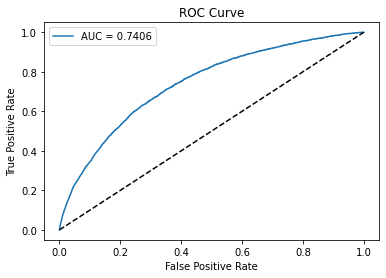

In [243]:
fpr, tpr, tr = roc_curve(
    df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(
    df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### Kolmogorov-Smirnov

In [244]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - \
    df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / \
    df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / \
    df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / \
    (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [245]:
df_actual_predicted.head()


,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,260591,0,0.021766,1,0,1,0.000016,0.0,0.000018
1,47105,0,0.026578,2,0,2,0.000033,0.0,0.000035
2,93097,0,0.027255,3,0,3,0.000049,0.0,0.000053
3,108815,0,0.030802,4,0,4,0.000065,0.0,0.000071
4,221042,0,0.031643,5,0,5,0.000081,0.0,0.000088


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.3600')

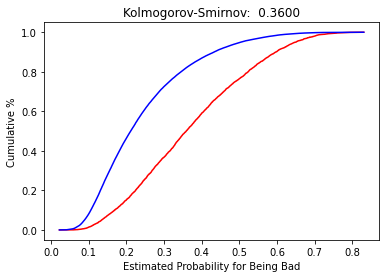

In [246]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

#### Validation Result

Model yang dibangun menghasilkan performa `AUC = 0.7406` dan `KS = 0.3600`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

### Save Model

In [247]:
filename = 'credit_risk_prediction.sav'
pickle.dump(rf, open(filename, 'wb'))

---
## Data Test Prediction

### Cleaning, Preprocessing, Feature Engineering

In [163]:
new_test = test.loc[:, test.columns.isin(
    ["SK_ID_CURR"]) + ~test.columns.isin(unused_columns)].reset_index(drop=True)

In [164]:
new_test["CODE_GENDER"] = new_test["CODE_GENDER"].replace("XNA", np.nan)
new_test["NAME_FAMILY_STATUS"] = new_test["NAME_FAMILY_STATUS"].replace(
    "Unknown", np.nan)
new_test["OCCUPATION_TYPE"] = new_test["OCCUPATION_TYPE"].replace(
    np.nan, "XNA")
new_test["NAME_EDUCATION_TYPE"] = new_test["NAME_EDUCATION_TYPE"].replace(
    ordinal_mapping)

In [165]:
new_test.dropna(subset=dropna_columns, inplace=True)
new_test.reset_index(drop=True, inplace=True)

In [167]:
for strategy in attr_imp.values():
    for attr in strategy[1]:
        new_test[attr] = strategy[0].fit_transform(new_test[[attr]])

In [168]:
categorical_cols = [col for col in new_test.select_dtypes(include='object')]
for i in categorical_cols:
    print(i)
    print(np.setdiff1d(new_train[i].value_counts().index.to_numpy(),
                       new_test[i].value_counts().index.to_numpy()))

NAME_CONTRACT_TYPE
[]
CODE_GENDER
[]
FLAG_OWN_CAR
[]
FLAG_OWN_REALTY
[]
NAME_TYPE_SUITE
[]
NAME_INCOME_TYPE
['Maternity leave']
NAME_FAMILY_STATUS
[]
NAME_HOUSING_TYPE
[]
OCCUPATION_TYPE
[]
WEEKDAY_APPR_PROCESS_START
[]
ORGANIZATION_TYPE
[]


In [169]:
dummy_data = new_test.iloc[0]
dummy_data.NAME_INCOME_TYPE = "Maternity leave"
dummy_data.to_frame().T

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Maternity leave,4,Married,House / apartment,0.01885,-19241,-2329,-5170.0,-812,1,0,1,0,1,XNA,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.789654,0.15952,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
new_test = new_test.append(dummy_data, ignore_index = True)
new_test[new_test.NAME_INCOME_TYPE == "Maternity leave"].index

Int64Index([48744], dtype='int64')

In [171]:
print(np.setdiff1d(new_train.NAME_INCOME_TYPE.value_counts().index.to_numpy(),
                   new_test.NAME_INCOME_TYPE.value_counts().index.to_numpy()))

[]


In [172]:
onehot_test = pd.get_dummies(new_test[[x for x in categorical_cols if x != "NAME_EDUCATION_TYPE"]], drop_first=True)
onehot_test.drop(48744, inplace=True)
onehot_test

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [173]:
new_test.drop(48744, inplace=True)

In [180]:
numerical_cols = [col for col in new_test.columns.tolist(
) if col not in categorical_cols + ["SK_ID_CURR"]]

In [181]:
std_test = pd.DataFrame(ss.fit_transform(new_test[numerical_cols]), columns=numerical_cols)
std_test.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.559988,-0.427809,0.142475,-0.553580,-0.037477,1.648953,-0.164654,-0.733477,-0.483656,-0.056958,1.427241,0.484762,-0.507337,0.040035,-0.597571,2.268994,-0.164830,-0.073004,-0.024421,1.828060,-0.138545,-0.241633,-0.209477,-0.289777,-0.538296,-0.459316,1.498572,-1.982194,-0.401091,-0.279167,-0.400896,-0.250398,-0.753470,0.0,0.520828,-0.010129,-0.122358,-0.309618,-0.006406,-0.311524,-0.06718,0.0,-0.034216,0.0,0.0,0.0,0.0,0.0,0.0,-0.039517,0.0,0.0,0.0,-0.042538,-0.036585,-0.048265,-0.078421,-0.711321,-1.153865
1,-0.559988,-0.782413,-0.804537,-0.752831,-0.839362,-0.611196,1.009586,-0.461392,-0.498482,-1.168264,0.910437,0.484762,-0.507337,0.040035,-0.597571,-0.440724,-0.164830,-0.073004,-0.024421,-0.917400,-0.138545,-0.241633,-0.209477,-0.289777,-0.538296,-0.459316,-1.248835,-0.390774,-0.401091,-0.279167,-0.400896,-0.250398,1.226251,0.0,0.520828,-0.010129,-0.122358,-0.309618,-0.006406,-0.311524,-0.06718,0.0,-0.034216,0.0,0.0,0.0,0.0,0.0,0.0,-0.039517,0.0,0.0,0.0,-0.042538,-0.036585,-0.048265,-0.078421,-0.711321,0.589324
2,-0.559988,0.237075,0.401002,2.520066,0.497113,1.648953,-0.147258,-0.917718,-0.498406,0.786092,-0.287579,0.484762,-0.507337,0.040035,-0.597571,-0.440724,-0.164830,-0.073004,-0.024421,0.607856,-0.138545,-0.241633,-0.209477,-0.289777,-0.538296,-0.459316,1.002783,0.645349,-0.401091,-0.279167,-0.400896,-0.250398,0.252319,0.0,-1.920019,-0.010129,-0.122358,-0.309618,-0.006406,3.210026,-0.06718,0.0,-0.034216,0.0,0.0,0.0,0.0,0.0,0.0,-0.039517,0.0,0.0,0.0,-0.042538,-0.036585,-0.048265,-0.078421,0.773588,1.170387
3,2.260729,1.345214,2.896221,1.223666,3.303709,-0.611196,0.358078,0.483623,-0.480449,0.835352,-0.736836,0.484762,-0.507337,0.040035,1.673441,-0.440724,2.081317,-0.073004,-0.024421,-0.307298,-0.138545,-0.241633,-0.209477,-0.289777,-0.538296,-0.459316,-0.046033,0.655318,-0.401091,-0.279167,-0.400896,-0.250398,-0.827425,0.0,0.520828,-0.010129,-0.122358,-0.309618,-0.006406,-0.311524,-0.06718,0.0,-0.034216,0.0,0.0,0.0,0.0,0.0,0.0,-0.039517,0.0,0.0,0.0,-0.042538,-0.036585,-0.048265,-0.078421,-0.711321,0.589324
4,0.850370,0.015447,0.297651,0.165019,0.483748,-0.611196,-0.775825,0.699997,-0.482700,0.272381,-0.771247,0.484762,1.971078,0.040035,-0.597571,-0.440724,0.958244,-0.073004,-0.024421,-2.137605,-0.138545,-0.241633,-0.209477,-0.289777,1.857714,2.177152,-0.509396,0.000000,-0.401091,-0.279167,-0.400896,-0.250398,0.292141,0.0,0.520828,-0.010129,-0.122358,-0.309618,-0.006406,-0.311524,-0.06718,0.0,-0.034216,0.0,0.0,0.0,0.0,0.0,0.0,-0.039517,0.0,0.0,0.0,-0.042538,-0.036585,-0.048265,-0.078421,-0.711321,0.008261


In [182]:
data_model_test = pd.concat([new_test["SK_ID_CURR"], onehot_test, std_test], axis=1)

### Prediction

In [248]:
data_model_test.iloc[:,1:]

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7

In [249]:
loaded_model = pickle.load(open(filename, 'rb'))

In [250]:
test_pred = loaded_model.predict(data_model_test.iloc[:,1:])
test_proba = loaded_model.predict_proba(data_model_test.iloc[:,1:])

In [251]:
test_result = pd.DataFrame({"SK_ID_CURR": data_model_test.iloc[:, 0].tolist(),
                            "PREDICTION": test_pred.tolist(),
                            "PROBABILITY": test_proba[:,1].tolist()})
test_result


,SK_ID_CURR,PREDICTION,PROBABILITY
0,100001,0,0.11
1,100005,0,0.21
2,100013,0,0.06
3,100028,0,0.15
4,100038,0,0.19
...,...,...,...
48739,456221,0,0.04
48740,456222,0,0.13
48741,456223,0,0.16
48742,456224,0,0.10


In [252]:
val_count(test_result.PREDICTION)

,Values,Count,%
0,0,48739,99.99
1,1,5,0.01


<AxesSubplot:xlabel='PROBABILITY', ylabel='Count'>

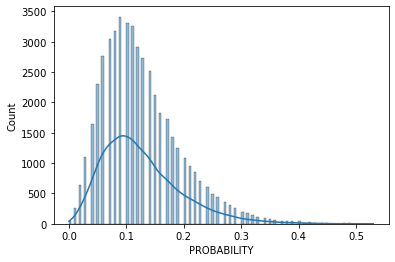

In [253]:
sns.histplot(data=test_result, x="PROBABILITY", kde=True)

### Save Result

In [254]:
save_result = test_result[["SK_ID_CURR", "PROBABILITY"]]
save_result.rename({"PROBABILITY": "TARGET"}, axis=1, inplace=True)
save_result

,SK_ID_CURR,TARGET
0,100001,0.11
1,100005,0.21
2,100013,0.06
3,100028,0.15
4,100038,0.19
...,...,...
48739,456221,0.04
48740,456222,0.13
48741,456223,0.16
48742,456224,0.10


In [255]:
save_result.to_csv("submission.csv", index=False)

## Feedback

Dikarenakan kurangnya waktu, terdapat beberapa hal lain yang dapat dilakukan untuk project ini:
- Mengintegrasikan dataset Train/Test dengan dataset lainnya untuk membuat datanya semakin akurat karena akan melihat perilaku klien diluar dataset Train/Test yang telah dipakai
- Analisis data lebih dalam untuk melihat apakah terdapat perilaku klien yang dapat meningkatkan kemungkinan klien tersebut berpotensi kredit macet atau tidak
- Penggunaan Pipeline agar model lebih terstruktur dan mudah untuk digunakan dalam tahap deployment
- Jika menginginkan interpretabilitas yang lebih tinggi, dapat mempertimbangkan untuk membuat Credit Scorecard dengan menggunakan algoritma Logistic Regression dengan pendekatan-pendekatannya seperti Feature Selection menggunakan Information Value dan Feature Engineering menggunakan Weight of Evidence.
- Jika interpretabilitas tidak terlalu dibutuhkan, dapat mempertimbangkan untuk mencoba algoritma-algoritma Machine Learning lainnya seperti Boosting.
- Melakukan pemeriksaan atau memastikan bahwa model yang telah dibuat tidak overfitting. Hal ini dapat dilakukan dengan mencoba membandingkan hasil performa model ketika diprediksi terhadap data training dan ketika diprediksi terhadap data testing.